In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
# !pip install seaborn==0.11.1
# !pip install matplotlib==3.5.3

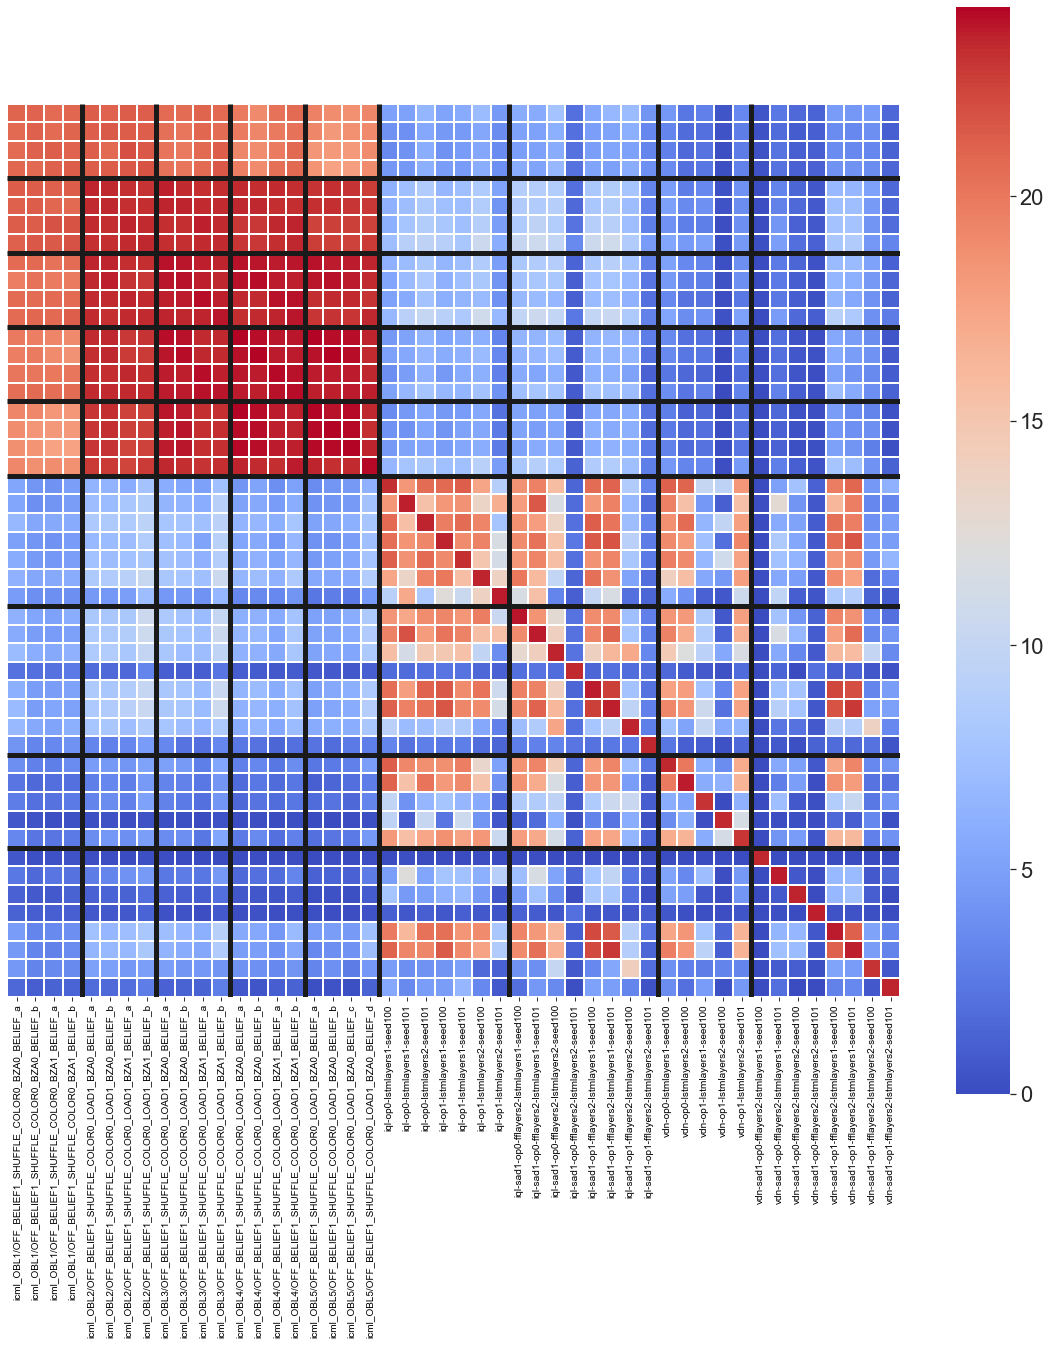

In [3]:
df = pd.read_csv('data/cross_play_scores.csv')
df = df.drop('Unnamed: 0', axis=1)
df.index = df.columns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))

sns.set(font_scale=2)

remove = [ 'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_d',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_e',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA0_BELIEF_c',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA0_BELIEF_d',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA0_BELIEF_e',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_c',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_b',
       'icml_run3_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA0_BELIEF_a',]
for c in remove:
    df = df.drop(c, axis=1)
df = df.loc[df.columns]
df.sort_index(axis=0, inplace=True)
df.sort_index(axis=1, inplace=True)

# rename = True
# if rename == True:
#     name_dict = dict((c,'A') for c in df.columns)
#     df.rename(name_dict, axis='index', inplace=True)
#     df.rename(name_dict, axis='columns', inplace=True)
    
# Plot the heatmap using seaborn
ax = sns.heatmap(df, norm=colors.PowerNorm(gamma=1), square=True, linewidths=2, xticklabels=True, yticklabels=False, cmap="coolwarm")

for i in range(1, 6):
    ax.hlines([4*i], *ax.get_xlim(), lw=5, color='k')
    ax.vlines([4*i], *ax.get_xlim(), lw=5, color='k')

ax.hlines([27], *ax.get_xlim(), lw=5, color='k')
ax.vlines([27], *ax.get_xlim(), lw=5, color='k')
ax.hlines([35], *ax.get_xlim(), lw=5, color='k')
ax.vlines([35], *ax.get_xlim(), lw=5, color='k')
ax.hlines([40], *ax.get_xlim(), lw=5, color='k')
ax.vlines([40], *ax.get_xlim(), lw=5, color='k')
# Increase the size of the plot

plt.gcf().set_size_inches(20, 20)

# Show the plot
# plt.show()
# plt.savefig('CP_OBL_NEW.png', bbox_inches="tight")

In [4]:
def compute_metric(cross_play_matrix):
    cross_play_matrix = cross_play_matrix / 25
    diag_idx = np.eye(cross_play_matrix.shape[0],dtype=bool)
    diversity = -np.mean(cross_play_matrix[~diag_idx]) + 1
    
    strength = np.mean(cross_play_matrix.max(axis=0))
    return diversity.round(2), strength.round(2)

In [5]:
learner_labels = {'vdn-op1-lstmlayers1-seed100': 'VDN + OP', 'vdn-op0-lstmlayers1-seed100': 'VDN',
           'icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_a': 'OBL', 'iql-op0-lstmlayers1-seed100': 'IQL',
           'iql-op1-lstmlayers1-seed100': 'IQL + OP'}

## Medium Diversity

D: 0.62, S: 0.94


,iql-op0-lstmlayers2-seed101,iql-op1-lstmlayers2-seed100,vdn-op0-lstmlayers2-seed100,vdn-op1-lstmlayers2-seed100,icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d
iql-op0-lstmlayers2-seed101,23.507,19.360,20.544,9.827,7.915
iql-op1-lstmlayers2-seed100,19.307,23.537,15.614,4.502,8.612
vdn-op0-lstmlayers2-seed100,20.221,15.209,23.656,6.218,2.819
vdn-op1-lstmlayers2-seed100,10.204,4.173,6.057,23.310,0.274
icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d,8.220,9.113,3.228,0.167,24.106


 vdn-op1-lstmlayers1-seed100 **** 4.212
 vdn-op0-lstmlayers1-seed100 **** 12.124600000000001
 icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_a **** 7.1373999999999995
 iql-op0-lstmlayers1-seed100 **** 14.953800000000001
 iql-op1-lstmlayers1-seed100 **** 13.182400000000001


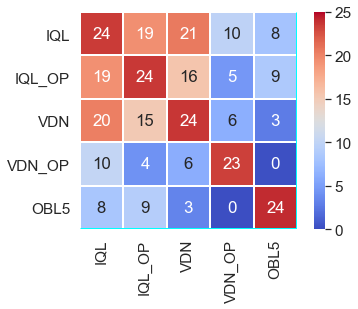

In [6]:
sns.set(font_scale=1.4)

partners_1 = [
                'iql-op0-lstmlayers2-seed101',
              'iql-op1-lstmlayers2-seed100',
              'vdn-op0-lstmlayers2-seed100',
              'vdn-op1-lstmlayers2-seed100',
              'icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d']
names = ['IQL', 'IQL_OP', 'VDN', 'VDN_OP', 'OBL5']

partners = partners_1
# names = list(learner_labels.values()) + names

df1 = df[partners].loc[partners]
print(f"D: {compute_metric(np.array(df1))[0]}, S: {compute_metric(np.array(df1))[1]}")
display(df1)
rename = True
if rename == True:
    name_dict = dict((c,n) for c,n in zip(df1.columns, names))
    df1.rename(name_dict, axis='index', inplace=True)
    df1.rename(name_dict, axis='columns', inplace=True)

ax = sns.heatmap(df1,   annot=True, fmt=".0f", square=True, linewidths=2, xticklabels=True, yticklabels=True, vmin=0, vmax=25, cmap="coolwarm")
plt.yticks(rotation=0) 
ax.hlines([5], *ax.get_xlim(), lw=3, color='cyan')
ax.vlines([5], *ax.get_xlim(), lw=3, color='cyan')
# plt.savefig('medium-div_partners.pdf')
# norm=colors.PowerNorm(gamma=5),
for l in learner_labels.keys():
    zsc_list = []
    for p in partners_1:
        zsc_list.append(df.loc[l][p])
    print(f" {l} **** {np.mean(zsc_list)}")

## High Diversity

D: 0.76, S: 0.93


,iql-op0-lstmlayers2-seed101,iql-op1-lstmlayers2-seed101,icml_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_a,vdn-op1-lstmlayers2-seed100,icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d
iql-op0-lstmlayers2-seed101,23.507,7.851,5.617,9.827,7.915
iql-op1-lstmlayers2-seed101,8.251,23.665,3.850,0.636,4.604
icml_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_a,5.915,3.672,21.285,0.211,18.976
vdn-op1-lstmlayers2-seed100,10.204,0.643,0.243,23.310,0.274
icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d,8.220,4.824,18.902,0.167,24.106


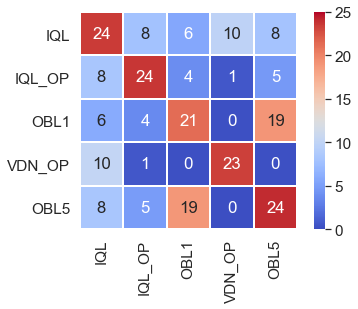

 vdn-op1-lstmlayers1-seed100 **** 2.7108
 vdn-op0-lstmlayers1-seed100 **** 7.085600000000001
 icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_a **** 9.8714
 iql-op0-lstmlayers1-seed100 **** 9.8858
 iql-op1-lstmlayers1-seed100 **** 8.838400000000002


In [7]:
partners_2 = [
                'iql-op0-lstmlayers2-seed101',
              'iql-op1-lstmlayers2-seed101', # 'iql-op1-lstmlayers2-seed100',
              'icml_OBL1/OFF_BELIEF1_SHUFFLE_COLOR0_BZA1_BELIEF_a', # 'vdn-op0-lstmlayers2-seed100',
              'vdn-op1-lstmlayers2-seed100',
              'icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d']
names = ['IQL', 'IQL_OP', 'OBL1', 'VDN_OP', 'OBL5']
df1 = df[partners_2].loc[partners_2]
print(f"D: {compute_metric(np.array(df1))[0]}, S: {compute_metric(np.array(df1))[1]}")
display(df1)
rename = True
if rename == True:
    name_dict = dict((c,n) for c,n in zip(df1.columns, names))
    df1.rename(name_dict, axis='index', inplace=True)
    df1.rename(name_dict, axis='columns', inplace=True)

ax = sns.heatmap(df1,   annot=True, fmt=".0f", square=True, linewidths=2, xticklabels=True, yticklabels=True, vmin=0, vmax=25, cmap="coolwarm")
plt.yticks(rotation=0) 
# plt.savefig('high_div_partners.pdf')
# norm=colors.PowerNorm(gamma=5),
plt.show()

for l in learner_labels.keys():
    zsc_list = []
    for p in partners_2:
        zsc_list.append(df.loc[l][p])
    print(f" {l} **** {np.mean(zsc_list)}")

## Low Diversity

D: 0.5, S: 0.94


,iql-op0-lstmlayers2-seed101,iql-op0-lstmlayers1-seed101,vdn-op0-lstmlayers2-seed100,vdn-op1-lstmlayers2-seed101,icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d
iql-op0-lstmlayers2-seed101,23.507,15.588,20.544,17.753,7.915
iql-op0-lstmlayers1-seed101,15.388,23.574,15.462,15.469,7.610
vdn-op0-lstmlayers2-seed100,20.221,15.409,23.656,16.430,2.819
vdn-op1-lstmlayers2-seed101,17.359,15.575,16.428,22.919,4.516
icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d,8.220,7.775,3.228,4.559,24.106


 vdn-op1-lstmlayers1-seed100 **** 5.0948
 vdn-op0-lstmlayers1-seed100 **** 15.961599999999999
 icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_a **** 7.3346
 iql-op0-lstmlayers1-seed100 **** 16.8938
 iql-op1-lstmlayers1-seed100 **** 16.461800000000004


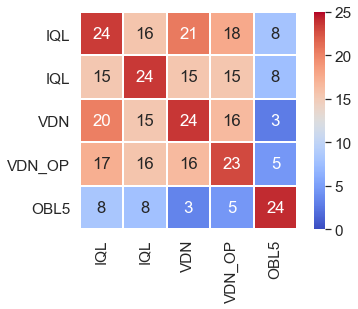

In [8]:
partners_3 = [
               'iql-op0-lstmlayers2-seed101',
                'iql-op0-lstmlayers1-seed101',
              'vdn-op0-lstmlayers2-seed100',
               'vdn-op1-lstmlayers2-seed101',
              'icml_OBL5/OFF_BELIEF1_SHUFFLE_COLOR0_LOAD1_BZA0_BELIEF_d']
names = ['IQL', 'IQL', 'VDN', 'VDN_OP', 'OBL5']
df1 = df[partners_3].loc[partners_3]
print(f"D: {compute_metric(np.array(df1))[0]}, S: {compute_metric(np.array(df1))[1]}")
display(df1)
rename = True
if rename == True:
    name_dict = dict((c,n) for c,n in zip(df1.columns, names))
    df1.rename(name_dict, axis='index', inplace=True)
    df1.rename(name_dict, axis='columns', inplace=True)

ax = sns.heatmap(df1,   annot=True, fmt=".0f", square=True, linewidths=2, xticklabels=True, yticklabels=True, vmin=0, vmax=25, cmap="coolwarm")
plt.yticks(rotation=0) 
# plt.savefig('low_dic_partners.pdf')
# norm=colors.PowerNorm(gamma=5),
for l in learner_labels.keys():
    zsc_list = []
    for p in partners_3:
        zsc_list.append(df.loc[l][p])
    print(f" {l} **** {np.mean(zsc_list)}")